# Projeto Final Python 
## Ana Macedo
## Luís Machado
## Mbokeno Lowa

In [130]:
#Bibliotecas necessárias
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np

In [131]:
#Definir DataFrame
df = pd.read_csv ('Titanic.csv', engine = 'python')

In [132]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [133]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Tratamento de Nulos

In [134]:
#Delete da coluna Cabin
df.drop('Cabin', axis = 1, inplace = True)

In [135]:
#Substituir os Nulos da coluna Embarked pelo mais usual
most_common = df["Embarked"].mode()[0]
df.fillna({'Embarked': most_common}, inplace=True)

In [136]:
#Substiuir os Nulos da coluna Age pela média total
mask_f = df['Sex'] == 'female'
mask_m = df['Sex'] == 'male'
media_age_f = df['Age'].loc[mask_f].mean()
media_age_m = df['Age'].loc[mask_m].mean()
df.loc[mask_f, 'Age'] = df.loc[mask_f, 'Age'].fillna(media_age_f)
df.loc[mask_m, 'Age'] = df.loc[mask_m, 'Age'].fillna(media_age_m)

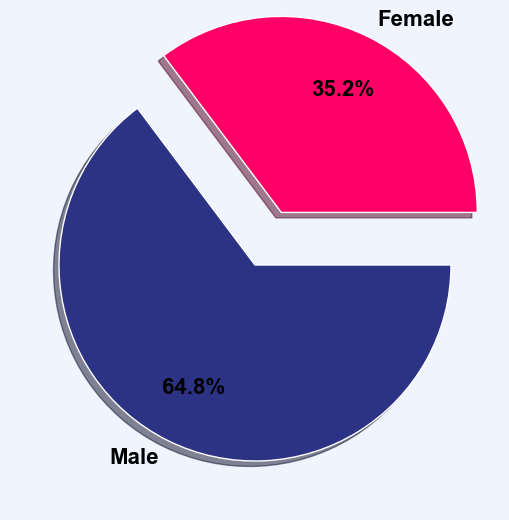

In [205]:
#Gráfico da distribuição de passageiros por gênero
plt.figure(facecolor="#f0f4ff")
df.groupby('Sex').size().plot.pie(colors=('#FF0066','#2C3385'),
                                    labels=('Female', 'Male'),
                                    autopct='%1.1f%%',
                                    pctdistance=0.7,
                                    textprops=dict({'color': 'black', 'weight': 'bold', 'size': '16'}),
                                    shadow=True, 
                                    explode=(0.3, 0),    
                                    figsize=(5,5),
                                    ylabel=''
                                    )
plt.savefig("passenger_gender.png", dpi=300, bbox_inches="tight")
plt.show()

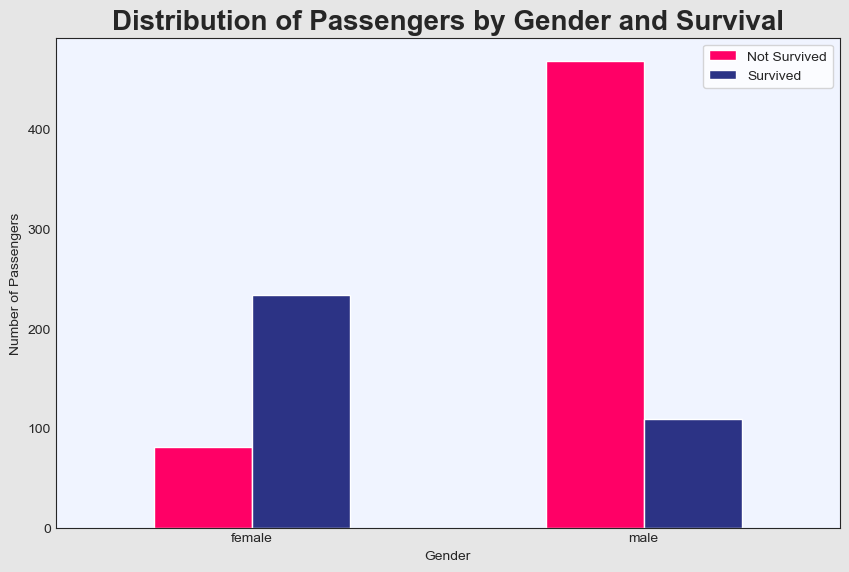

In [169]:
#Gráfico da distribuição da sobrevivência por sexo
fig, ax = plt.subplots(figsize=(8,5))
ax.set_facecolor("#f0f4ff")
fig.set_facecolor("#e6e6e6")

tabela = pd.crosstab(df['Sex'], df['Survived'])
tabela.plot(kind='bar', ax=ax, color=["#FF0066", "#2C3385"])

ax.set_title("Distribution of Passengers by Gender and Survival", fontweight="bold", fontsize=20)
ax.set_xlabel("Gender")
ax.set_ylabel("Number of Passengers")
ax.legend(["Not Survived", "Survived"])
plt.xticks(rotation=0)
plt.savefig("gender_survival.png", dpi=300, bbox_inches="tight")
plt.show()

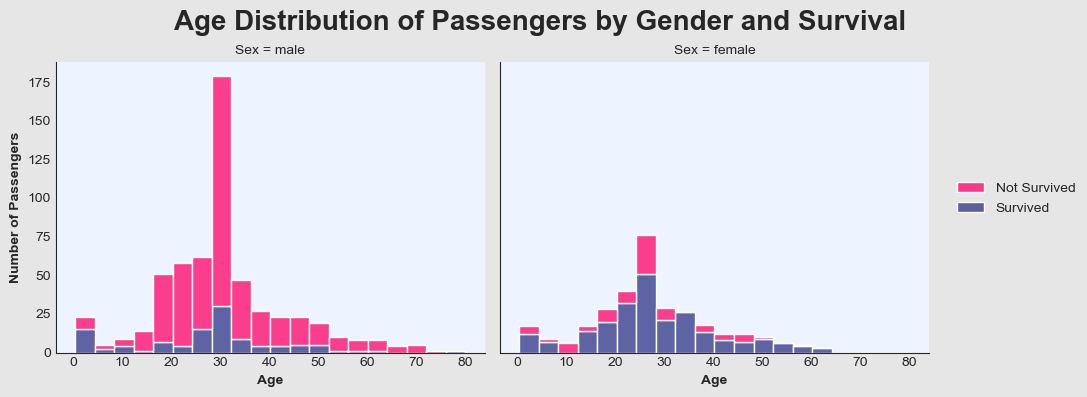

In [160]:
#Gráfico para distribuição de idades 
sns.set_style("white")

df['Survived_Label'] = df['Survived'].map({
    0: "Not Survived",
    1: "Survived"
})
g = sns.displot(
    data=df,
    x="Age",
    col="Sex",
    hue="Survived_Label",
    kind="hist",
    multiple="stack",
    bins=20,
    height=4,
    aspect=1.2,
    palette=["#FF0066", "#2C3385"]
)
 
for ax in g.axes.flatten():
    ax.set_facecolor("#eef4ff")

g.fig.patch.set_facecolor("#e6e6e6")
g.set_ylabels("Number of Passengers", fontweight="bold")
g.set_xlabels("Age", fontweight="bold")
g._legend.set_title(None)
plt.subplots_adjust(top=0.85)
plt.suptitle("Age Distribution of Passengers by Gender and Survival", fontweight="bold", fontsize=20)
plt.show()

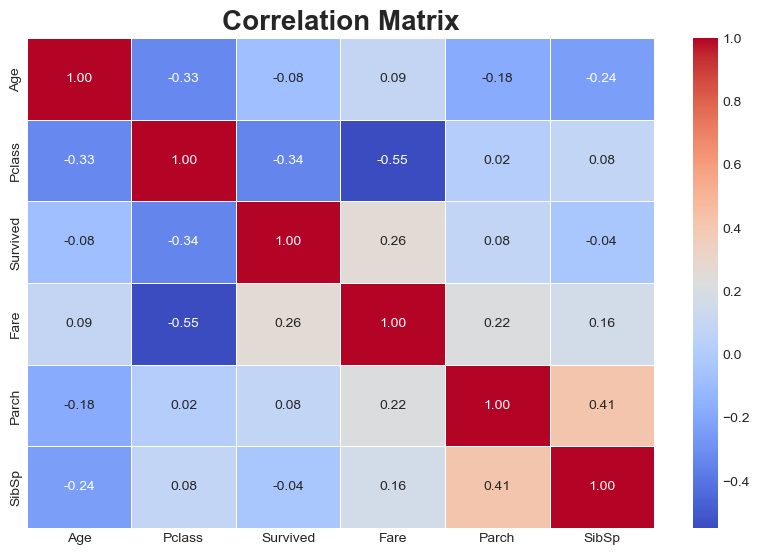

In [195]:
#Correlation Matrix
plt.figure(figsize=(8, 5))
corr_mtx = df[['Age', 'Pclass', 'Survived', 'Fare', 'Parch', 'SibSp']].corr()
sns.heatmap(corr_mtx, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix', fontsize=20, fontweight='bold')
plt.savefig("corr_matrix.png", dpi=300, bbox_inches="tight")
plt.show()

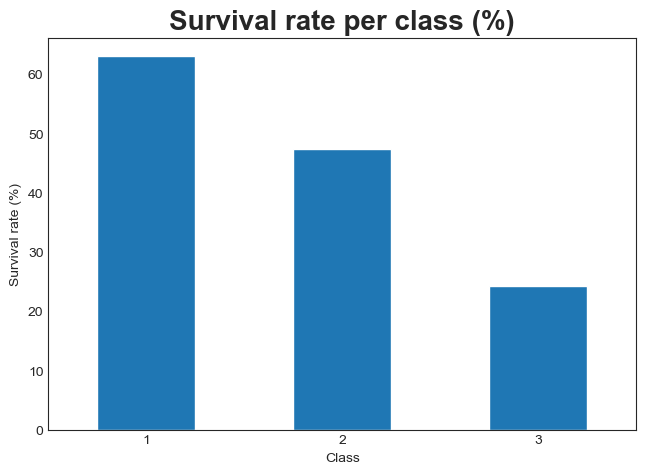

In [194]:
#Gráfico de taxa de sobrevivencia por class
plt.figure(figsize=(6, 4))
survival_rate = df.groupby("Pclass")["Survived"].mean() * 100
survival_rate.plot(kind="bar")

plt.title("Survival rate per class (%)", fontweight="bold", fontsize=20)
plt.xlabel("Class")
plt.ylabel("Survival rate (%)")
plt.xticks(rotation=0)
plt.savefig("survival_class.png", dpi=300, bbox_inches="tight")
plt.show()

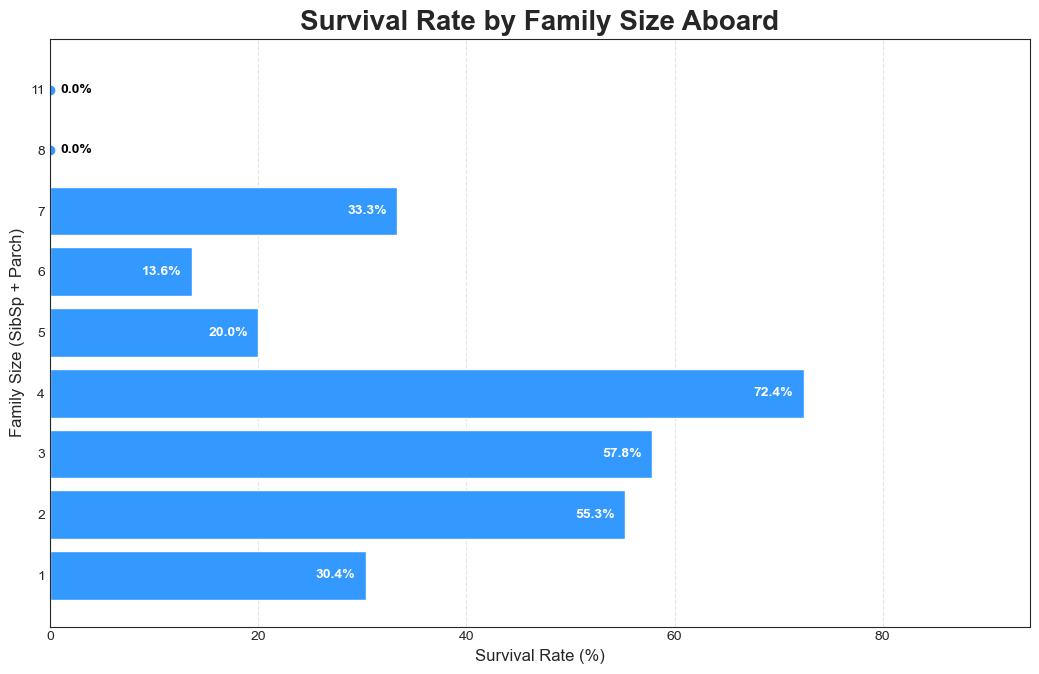

In [203]:
#Taxa de sobrevivencia por Family Size
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
family_survival = df.groupby("FamilySize")["Survived"].mean() * 100
plt.figure(figsize=(10,6))

bars = plt.barh(family_survival.index.astype(str), family_survival.values, color="#3399FF")

for bar in bars:
    width = bar.get_width()
    y = bar.get_y() + bar.get_height()/2
    if width < 5:
        plt.text(width + 1, y, f'{width:.1f}%', va='center', ha='left', color='black', fontweight='bold')
        plt.plot(width, y, 'o', color="#3399FF")
    else:
        plt.text(width - 1, y, f'{width:.1f}%', va='center', ha='right', color='white', fontweight='bold')

plt.title("Survival Rate by Family Size Aboard", fontweight="bold", fontsize=20)
plt.ylabel("Family Size (SibSp + Parch)", fontsize=12)
plt.xlabel("Survival Rate (%)", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlim(0, max(family_survival.values)*1.3)
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.savefig("suvival_family_size.png", dpi=300, bbox_inches="tight")
plt.show()


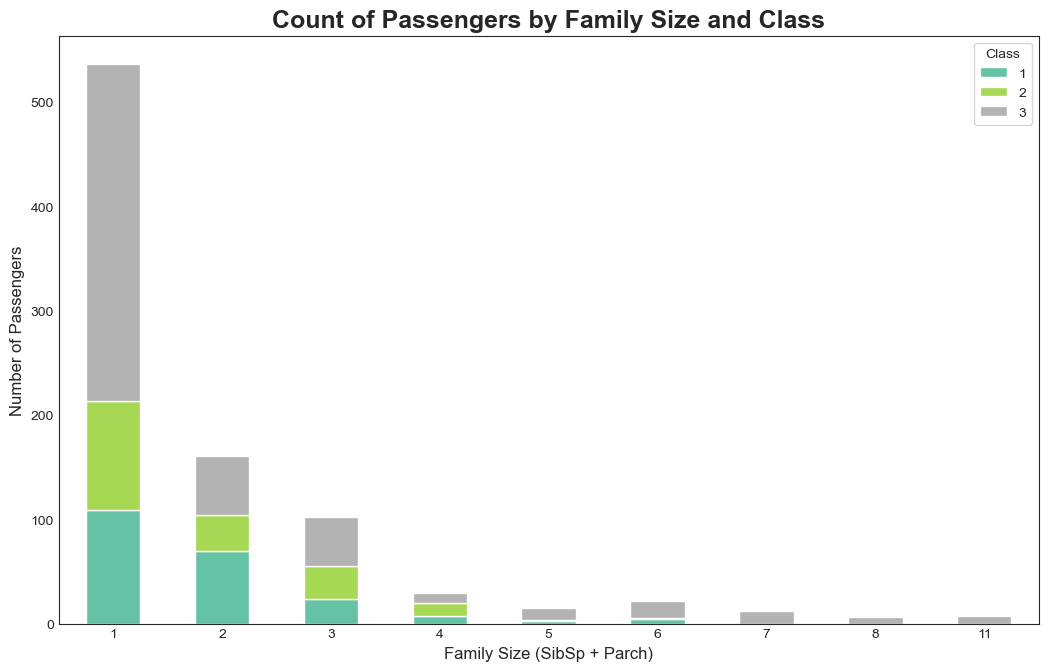

In [204]:
#Numero de passageiros por Family Size e CLass
family_class = pd.crosstab(df['FamilySize'], df['Pclass'])
family_class.plot(kind='bar', stacked=True, figsize=(10,6), colormap='Set2')

plt.title("Count of Passengers by Family Size and Class", fontweight="bold", fontsize=18)
plt.xlabel("Family Size (SibSp + Parch)", fontsize=12)
plt.ylabel("Number of Passengers", fontsize=12)
plt.legend(title="Class", fontsize=10)
plt.xticks(rotation=0)
plt.savefig("passegenrs_familysize.png", dpi=300, bbox_inches="tight")
plt.show()